In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point, LineString, Polygon
from dateutil.parser import parse
import requests 
import json
from io import StringIO
import plotly.express as px
# these are all things that might be currently needed 

In [ ]:
#use your own token
headers={'X-App-Token':'BLANK'}
##https://dev.socrata.com/foundry/data.sfgov.org/wr8u-xric go here to create a token 

url='https://data.sfgov.org/api/v3/views/wr8u-xric/query.json?query=SELECT%0A%20%20%60incident_number%60%2C%0A%20%20%60exposure_number%60%2C%0A%20%20%60id%60%2C%0A%20%20%60address%60%2C%0A%20%20%60incident_date%60%2C%0A%20%20%60call_number%60%2C%0A%20%20%60alarm_dttm%60%2C%0A%20%20%60arrival_dttm%60%2C%0A%20%20%60close_dttm%60%2C%0A%20%20%60city%60%2C%0A%20%20%60zipcode%60%2C%0A%20%20%60battalion%60%2C%0A%20%20%60station_area%60%2C%0A%20%20%60box%60%2C%0A%20%20%60suppression_units%60%2C%0A%20%20%60suppression_personnel%60%2C%0A%20%20%60ems_units%60%2C%0A%20%20%60ems_personnel%60%2C%0A%20%20%60other_units%60%2C%0A%20%20%60other_personnel%60%2C%0A%20%20%60first_unit_on_scene%60%2C%0A%20%20%60estimated_property_loss%60%2C%0A%20%20%60estimated_contents_loss%60%2C%0A%20%20%60fire_fatalities%60%2C%0A%20%20%60fire_injuries%60%2C%0A%20%20%60civilian_fatalities%60%2C%0A%20%20%60civilian_injuries%60%2C%0A%20%20%60number_of_alarms%60%2C%0A%20%20%60primary_situation%60%2C%0A%20%20%60mutual_aid%60%2C%0A%20%20%60action_taken_primary%60%2C%0A%20%20%60action_taken_secondary%60%2C%0A%20%20%60action_taken_other%60%2C%0A%20%20%60detector_alerted_occupants%60%2C%0A%20%20%60property_use%60%2C%0A%20%20%60area_of_fire_origin%60%2C%0A%20%20%60ignition_cause%60%2C%0A%20%20%60ignition_factor_primary%60%2C%0A%20%20%60ignition_factor_secondary%60%2C%0A%20%20%60heat_source%60%2C%0A%20%20%60item_first_ignited%60%2C%0A%20%20%60human_factors_associated_with_ignition%60%2C%0A%20%20%60structure_type%60%2C%0A%20%20%60structure_status%60%2C%0A%20%20%60floor_of_fire_origin%60%2C%0A%20%20%60fire_spread%60%2C%0A%20%20%60no_flame_spread%60%2C%0A%20%20%60number_of_floors_with_minimum_damage%60%2C%0A%20%20%60number_of_floors_with_significant_damage%60%2C%0A%20%20%60number_of_floors_with_heavy_damage%60%2C%0A%20%20%60number_of_floors_with_extreme_damage%60%2C%0A%20%20%60detectors_present%60%2C%0A%20%20%60detector_type%60%2C%0A%20%20%60detector_operation%60%2C%0A%20%20%60detector_effectiveness%60%2C%0A%20%20%60detector_failure_reason%60%2C%0A%20%20%60automatic_extinguishing_system_present%60%2C%0A%20%20%60automatic_extinguishing_sytem_type%60%2C%0A%20%20%60automatic_extinguishing_sytem_perfomance%60%2C%0A%20%20%60automatic_extinguishing_sytem_failure_reason%60%2C%0A%20%20%60number_of_sprinkler_heads_operating%60%2C%0A%20%20%60supervisor_district%60%2C%0A%20%20%60neighborhood_district%60%2C%0A%20%20%60point%60%2C%0A%20%20%60data_as_of%60%2C%0A%20%20%60data_loaded_at%60'
r=requests.get(url,headers=headers)
# this needs to be updated to use api 
# r1=requests.get('https://data.sfgov.org/resource/wr8u-xric.geojson')

In [3]:
df_base=pd.read_json(StringIO(json.dumps(r.json())))


In [4]:
df_base['incident_year']=df_base['incident_date'].apply(lambda x:parse(x).year)
df_base['incident_month']=df_base['incident_date'].apply(lambda x:parse(x).month)

In [5]:
base_date=df_base.groupby(['neighborhood_district','primary_situation'],as_index=False)['incident_date'].nunique()
# this is the amount of unique incident_dates for each neighborhood and primary_situation
base_amount=df_base.groupby(['neighborhood_district','primary_situation'],as_index=False)['incident_number'].nunique()
# this is the amount of unique incident_numbers for each neighborhood and primary_situation


In [6]:
base_date.columns=['neighborhood_district','primary_situation','date_amount']
base_amount.columns=['neighborhood_district','primary_situation','incident_amount']
base_amount=base_amount.sort_values(by='incident_amount',ascending=False)
base_date=base_date.sort_values(by='date_amount',ascending=False)
base_amount=base_amount.reset_index(drop=True)
base_date=base_date.reset_index(drop=True)

In [7]:
base_amount=base_amount.reset_index(drop=True)
base_date=base_date.reset_index(drop=True)

In [8]:
base_amount

,neighborhood_district,primary_situation,incident_amount
0,Mission,"711 - Municipal alarm system, Street Box False",7149
1,South of Market,"711 - Municipal alarm system, Street Box False",6759
2,Tenderloin,"711 - Municipal alarm system, Street Box False",6672
3,Financial District/South Beach,"700 False alarm or false call, other",4503
4,Tenderloin,"700 False alarm or false call, other",4139
...,...,...,...
10110,Bayview Hunters Point,121 - Fire in mob. home used as residence,1
10111,Inner Sunset,471 - Explosive/bomb removal(bomb scare =721),1
10112,Western Addition,814 - Lightning strike (no fire),1
10113,Western Addition,"800 - Severe weather/Nat. disaster, other",1


In [9]:
# base_amount[base_amount['primary_situation']=='700 - False alarm or false call, other'].sort_values(by='incident_number',ascending=False)

In [10]:
base_amount

,neighborhood_district,primary_situation,incident_amount
0,Mission,"711 - Municipal alarm system, Street Box False",7149
1,South of Market,"711 - Municipal alarm system, Street Box False",6759
2,Tenderloin,"711 - Municipal alarm system, Street Box False",6672
3,Financial District/South Beach,"700 False alarm or false call, other",4503
4,Tenderloin,"700 False alarm or false call, other",4139
...,...,...,...
10110,Bayview Hunters Point,121 - Fire in mob. home used as residence,1
10111,Inner Sunset,471 - Explosive/bomb removal(bomb scare =721),1
10112,Western Addition,814 - Lightning strike (no fire),1
10113,Western Addition,"800 - Severe weather/Nat. disaster, other",1


It looks like False calls might happen alot 
for  the situations with over 1000 incidents 
how many are from one address  in one neighborhood year over year 

In [11]:
base_amount[base_amount['incident_amount']>1000]

,neighborhood_district,primary_situation,incident_amount
0,Mission,"711 - Municipal alarm system, Street Box False",7149
1,South of Market,"711 - Municipal alarm system, Street Box False",6759
2,Tenderloin,"711 - Municipal alarm system, Street Box False",6672
3,Financial District/South Beach,"700 False alarm or false call, other",4503
4,Tenderloin,"700 False alarm or false call, other",4139
...,...,...,...
87,Sunset/Parkside,"440 Electrical wiring/equipment problem, other",1016
88,Mission,322 - Vehicle accident with injuries,1016
89,Mission,"311 Medical assist, assist EMS crew",1011
90,North Beach,"711 - Municipal alarm system, Street Box False",1011


In [12]:
# we will use this to filter the data 
filter_table=base_date[base_date['date_amount']>1000]

In [13]:
filter_table

,neighborhood_district,primary_situation,date_amount
0,Mission,"711 - Municipal alarm system, Street Box False",3050
1,South of Market,"711 - Municipal alarm system, Street Box False",2852
2,Tenderloin,"711 - Municipal alarm system, Street Box False",2842
3,Financial District/South Beach,"700 False alarm or false call, other",2436
4,Tenderloin,"700 False alarm or false call, other",2354
...,...,...,...
57,Tenderloin,733 - Smoke detector activation/malfunction,1016
58,Castro/Upper Market,"711 - Municipal alarm system, Street Box False",1015
59,South of Market,"700 - False alarm or false call, other",1008
60,Hayes Valley,"711 - Municipal alarm system, Street Box False",1007


In [14]:
df_base

,incident_number,exposure_number,id,address,incident_date,call_number,alarm_dttm,arrival_dttm,close_dttm,city,...,detector_alerted_occupants,action_taken_other,detector_failure_reason,box,automatic_extinguishing_sytem_type,automatic_extinguishing_sytem_perfomance,ignition_factor_secondary,automatic_extinguishing_sytem_failure_reason,incident_year,incident_month
0,8016811,0,80168110,480 Ellis St.,2008-02-23T00:00:00.000,80540016,2008-02-23T01:06:36.000,2008-02-23T01:09:17.000,2008-02-23T01:29:19.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
1,8016813,0,80168130,954 Geary St.,2008-02-23T00:00:00.000,80540018,2008-02-23T01:25:36.000,2008-02-23T01:28:57.000,2008-02-23T01:43:15.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
2,8016822,0,80168220,2460 Lombard St.,2008-02-23T00:00:00.000,80540030,2008-02-23T02:05:37.000,2008-02-23T02:12:19.000,2008-02-23T02:19:06.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
3,8016823,0,80168230,2nd St. / Brannan St.,2008-02-23T00:00:00.000,80540032,2008-02-23T02:11:15.000,2008-02-23T02:14:48.000,2008-02-23T03:37:17.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
4,8016826,0,80168260,144 Murray St.,2008-02-23T00:00:00.000,80540034,2008-02-23T02:24:27.000,2008-02-23T02:31:29.000,2008-02-23T03:13:27.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718905,13110510,0,131105100,450 GOLDEN GATE AV,2013-11-21T00:00:00.000,133250330,2013-11-21T20:16:51.000,2013-11-21T20:25:43.000,2013-11-21T20:35:04.000,SF,...,NaN,NaN,NaN,1644,NaN,NaN,NaN,NaN,2013,11
718906,13110512,0,131105120,116 NATOMA ST,2013-11-21T00:00:00.000,133250332,2013-11-21T20:21:58.000,2013-11-21T20:31:22.000,2013-11-21T20:46:02.000,SF,...,NaN,NaN,NaN,2157,NaN,NaN,NaN,NaN,2013,11
718907,13110513,0,131105130,166 SAN CARLOS ST,2013-11-21T00:00:00.000,133250334,2013-11-21T20:29:51.000,2013-11-21T20:36:46.000,2013-11-21T20:49:42.000,SF,...,NaN,NaN,NaN,5423,NaN,NaN,NaN,NaN,2013,11
718908,13110523,0,131105230,VAN NESS AV / CHESTNUT ST,2013-11-21T00:00:00.000,133250343,2013-11-21T21:07:51.000,2013-11-21T21:12:12.000,2013-11-21T22:03:08.000,SF,...,NaN,NaN,NaN,3144,NaN,NaN,NaN,NaN,2013,11


In [15]:
filtered_base=df_base[(df_base['primary_situation'].isin(pd.Series(filter_table['primary_situation'].unique()))) & (df_base['neighborhood_district'].isin(pd.Series(filter_table['neighborhood_district'].unique())))]

In [16]:
filtered_base

,incident_number,exposure_number,id,address,incident_date,call_number,alarm_dttm,arrival_dttm,close_dttm,city,...,detector_alerted_occupants,action_taken_other,detector_failure_reason,box,automatic_extinguishing_sytem_type,automatic_extinguishing_sytem_perfomance,ignition_factor_secondary,automatic_extinguishing_sytem_failure_reason,incident_year,incident_month
1,8016813,0,80168130,954 Geary St.,2008-02-23T00:00:00.000,80540018,2008-02-23T01:25:36.000,2008-02-23T01:28:57.000,2008-02-23T01:43:15.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
7,8016836,0,80168360,121 Spear St.,2008-02-23T00:00:00.000,80540049,2008-02-23T03:43:07.000,2008-02-23T03:49:26.000,2008-02-23T04:13:09.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
10,8016839,0,80168390,355 Bayshore Bl.,2008-02-23T00:00:00.000,80540053,2008-02-23T03:53:04.000,2008-02-23T03:58:36.000,2008-02-23T04:03:01.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
13,8016852,0,80168520,111 Powell St.,2008-02-23T00:00:00.000,80540068,2008-02-23T05:17:59.000,2008-02-23T05:24:33.000,2008-02-23T05:30:49.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
14,8016859,0,80168590,501 Delancey St.,2008-02-23T00:00:00.000,80540079,2008-02-23T06:09:13.000,2008-02-23T06:14:26.000,2008-02-23T06:27:13.000,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718887,13110447,0,131104470,5TH ST / BRYANT ST,2013-11-21T00:00:00.000,133250264,2013-11-21T16:26:15.000,2013-11-21T16:27:38.000,2013-11-21T16:29:57.000,SF,...,NaN,NaN,NaN,2242,NaN,NaN,NaN,NaN,2013,11
718891,13110466,0,131104660,8TH ST / MISSION ST,2013-11-21T00:00:00.000,133250284,2013-11-21T17:18:17.000,2013-11-21T17:22:14.000,2013-11-21T17:23:11.000,SF,...,NaN,NaN,NaN,2318,NaN,NaN,NaN,NaN,2013,11
718892,13110469,0,131104690,1 SOUTH VAN NESS AV,2013-11-21T00:00:00.000,133250287,2013-11-21T17:28:20.000,2013-11-21T17:32:24.000,2013-11-21T17:33:48.000,SF,...,NaN,NaN,NaN,5117,NaN,NaN,NaN,NaN,2013,11
718897,13110481,0,131104810,MASON ST / MARKET ST,2013-11-21T00:00:00.000,133250299,2013-11-21T18:29:17.000,2013-11-21T18:34:18.000,2013-11-21T18:34:53.000,SF,...,NaN,NaN,NaN,1365,NaN,NaN,NaN,NaN,2013,11


In [17]:
new_base=filtered_base[['incident_number','id','incident_date','primary_situation','neighborhood_district','incident_year','incident_month','point']]

In [ ]:
# amount tables will be what we will use for forecasting 


In [ ]:
# this gets the amount of incident_numbers for neighborhood_district by incident_year primary_situation
amount_table_by_year=new_base.groupby(['neighborhood_district','incident_year','primary_situation'],as_index=False)['incident_number'].nunique()
# this gets the amount of incident_numbers for neighborhood_district by incident_year incident_month primary_situation 
amount_table_by_year_month=new_base.groupby(['neighborhood_district','incident_year','incident_month','primary_situation'],as_index=False)['incident_number'].nunique()

In [ ]:
amount_table_by_year_month['date_key']=amount_table_by_year_month.apply(lambda x:(str(x['incident_year'])+"-"+str(x['incident_month'])),axis=1)

In [ ]:
# amount_table=amount_table.sort_values(by=['neighborhood_district','primary_situation'])

In [40]:
amount_table_by_year

,neighborhood_district,incident_year,primary_situation,incident_number
0,Bayview Hunters Point,2003,"113 - Cooking fire, confined to container",36
1,Bayview Hunters Point,2003,"700 - False alarm or false call, other",97
2,Bayview Hunters Point,2003,"711 - Municipal alarm system, Street Box False",608
3,Bayview Hunters Point,2003,733 - Smoke detector activation/malfunction,3
4,Bayview Hunters Point,2003,735 - Alarm system sounded due to malfunction,54
...,...,...,...,...
3182,Western Addition,2025,"700 False alarm or false call, other",97
3183,Western Addition,2025,"711 Municipal alarm system, malicious false alarm",3
3184,Western Addition,2025,735 Alarm system sounded due to malfunction,90
3185,Western Addition,2025,"743 Smoke detector activation, no fire - unint...",70


In [ ]:
amount_table_by_year['primary_situation_code']=amount_table_by_year['primary_situation'].apply(lambda x: x[0:3])
amount_table_by_year_month['primary_situation_code']=amount_table_by_year_month['primary_situation_code'].apply(lambda x: x[0:3])

In [ ]:
amount_table_by_year['rolling_number']=amount_table_by_year['incident_number'].rolling(window=1).sum()
amount_table_by_year_month['rolling_number']=amount_table_by_year_month['incident_number'].rolling(window=1).sum()

<Axes: xlabel='date_key', ylabel='incident_number'>

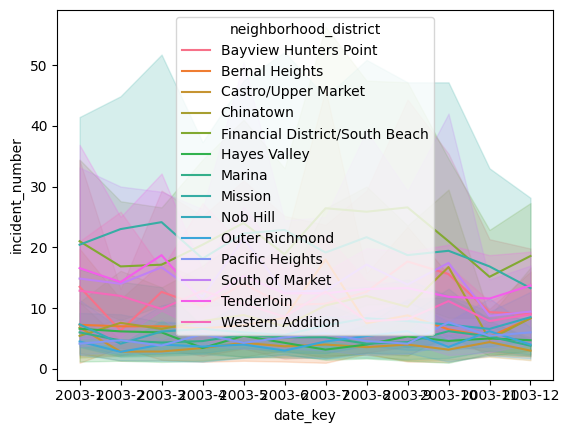

In [ ]:

sns.lineplot(data=amount_table_by_year_month[amount_table_by_year_month['incident_year']==2003],x='date_key',y='incident_number',hue='neighborhood_district')

<Axes: xlabel='date_key', ylabel='rolling_number'>

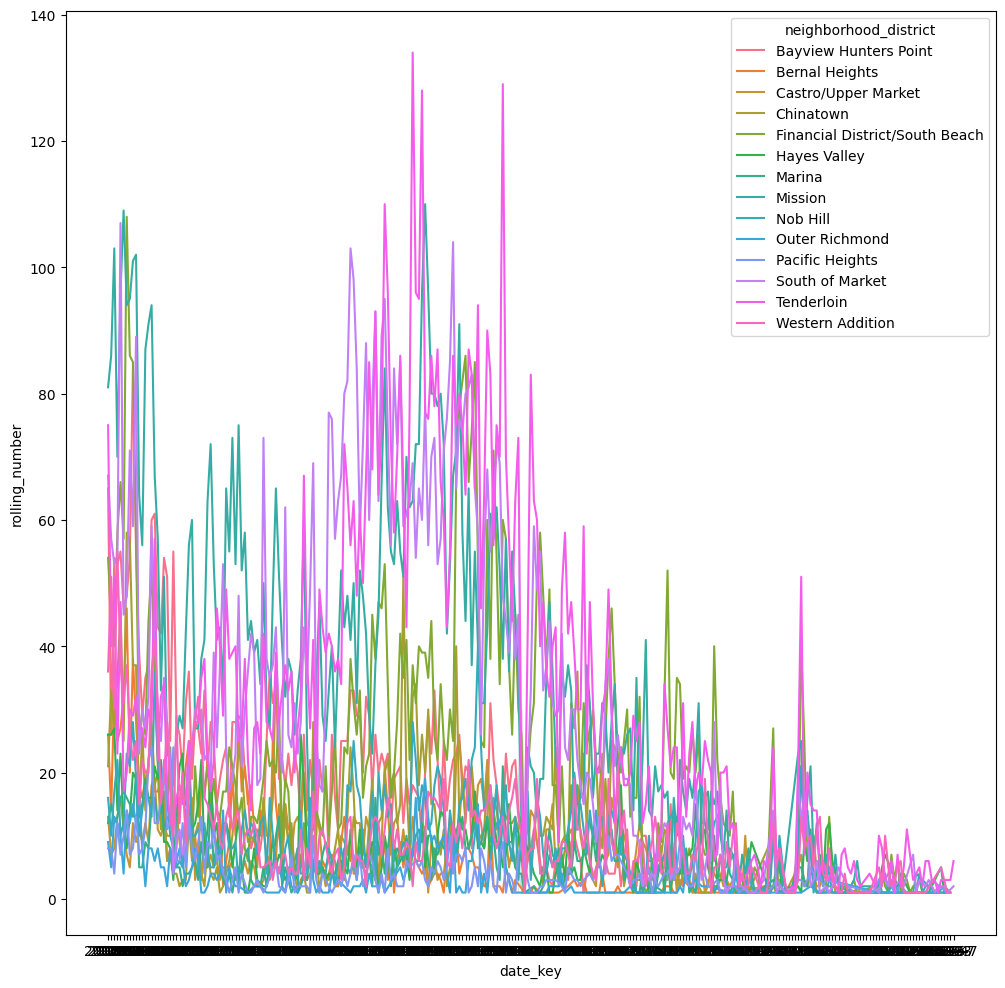

In [ ]:
plt.figure(figsize=(12, 12))
sns.lineplot(data=amount_table_by_year_month[amount_table_by_year_month['primary_situation'].str.contains('711')],x='date_key',y='rolling_number',hue='neighborhood_district')

In [ ]:
amount_table_by_year['primary_situation'].unique()

array(['113 - Cooking fire, confined to container',
       '700 - False alarm or false call, other',
       '711 - Municipal alarm system, Street Box False',
       '733 - Smoke detector activation/malfunction',
       '735 - Alarm system sounded due to malfunction',
       '740 - Unintentional alarm, other',
       '745 - Alarm system sounded/no fire-accidental',
       '113 Cooking fire, confined to container',
       '150 Outside rubbish fire, other',
       '151 Outside rubbish, trash or waste fire',
       '322 Motor vehicle accident with injuries',
       '353 Removal of victim(s) from stalled elevator',
       '500 Service Call, other', '554 Assist invalid',
       '700 False alarm or false call, other',
       '711 Municipal alarm system, malicious false alarm',
       '735 Alarm system sounded due to malfunction',
       '743 Smoke detector activation, no fire - unintentional',
       '745 Alarm system activation, no fire - unintentional'],
      dtype=object)

In [ ]:
amount_table_by_year.groupby(['neighborhood_district','incident_year','primary_situation','primary_situation_code'],as_index=False)['incident_number'].nunique()

,neighborhood_district,incident_year,primary_situation,primary_situation_code,incident_number
0,Bayview Hunters Point,2003,"113 - Cooking fire, confined to container",113,4
1,Bayview Hunters Point,2003,"700 - False alarm or false call, other",700,9
2,Bayview Hunters Point,2003,"711 - Municipal alarm system, Street Box False",711,10
3,Bayview Hunters Point,2003,733 - Smoke detector activation/malfunction,733,1
4,Bayview Hunters Point,2003,735 - Alarm system sounded due to malfunction,735,6
...,...,...,...,...,...
3182,Western Addition,2025,"700 False alarm or false call, other",700,7
3183,Western Addition,2025,"711 Municipal alarm system, malicious false alarm",711,1
3184,Western Addition,2025,735 Alarm system sounded due to malfunction,735,5
3185,Western Addition,2025,"743 Smoke detector activation, no fire - unint...",743,7


In [ ]:
amount_table_by_year

,neighborhood_district,incident_year,primary_situation,incident_number,rolling_number,primary_situation_code
0,Bayview Hunters Point,2003,"113 - Cooking fire, confined to container",36,36.0,113
1,Bayview Hunters Point,2003,"700 - False alarm or false call, other",97,97.0,700
2,Bayview Hunters Point,2003,"711 - Municipal alarm system, Street Box False",608,608.0,711
3,Bayview Hunters Point,2003,733 - Smoke detector activation/malfunction,3,3.0,733
4,Bayview Hunters Point,2003,735 - Alarm system sounded due to malfunction,54,54.0,735
...,...,...,...,...,...,...
3182,Western Addition,2025,"700 False alarm or false call, other",97,97.0,700
3183,Western Addition,2025,"711 Municipal alarm system, malicious false alarm",3,3.0,711
3184,Western Addition,2025,735 Alarm system sounded due to malfunction,90,90.0,735
3185,Western Addition,2025,"743 Smoke detector activation, no fire - unint...",70,70.0,743


In [46]:
amount_table_by_year[amount_table_by_year['primary_situation_code']=='700']

,neighborhood_district,incident_year,primary_situation,incident_number,rolling_number,primary_situation_code
1,Bayview Hunters Point,2003,"700 - False alarm or false call, other",97,97.0,700
8,Bayview Hunters Point,2004,"700 - False alarm or false call, other",59,59.0,700
15,Bayview Hunters Point,2005,"700 - False alarm or false call, other",66,66.0,700
22,Bayview Hunters Point,2006,"700 - False alarm or false call, other",47,47.0,700
29,Bayview Hunters Point,2007,"700 - False alarm or false call, other",49,49.0,700
...,...,...,...,...,...,...
3134,Western Addition,2021,"700 False alarm or false call, other",104,104.0,700
3146,Western Addition,2022,"700 False alarm or false call, other",114,114.0,700
3158,Western Addition,2023,"700 False alarm or false call, other",125,125.0,700
3170,Western Addition,2024,"700 False alarm or false call, other",107,107.0,700


In [45]:
fig = px.line(amount_table_by_year[amount_table_by_year['primary_situation_code']=='700'], x="incident_year", y="rolling_number", color='neighborhood_district')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(amount_table_by_year,
                 x="incident_year",
                  y="rolling_number", 
                  color="primary_situation_code",
                 size='rolling_number', hover_data=['neighborhood_district'])
fig.show()

<Axes: xlabel='incident_month', ylabel='incident_year'>

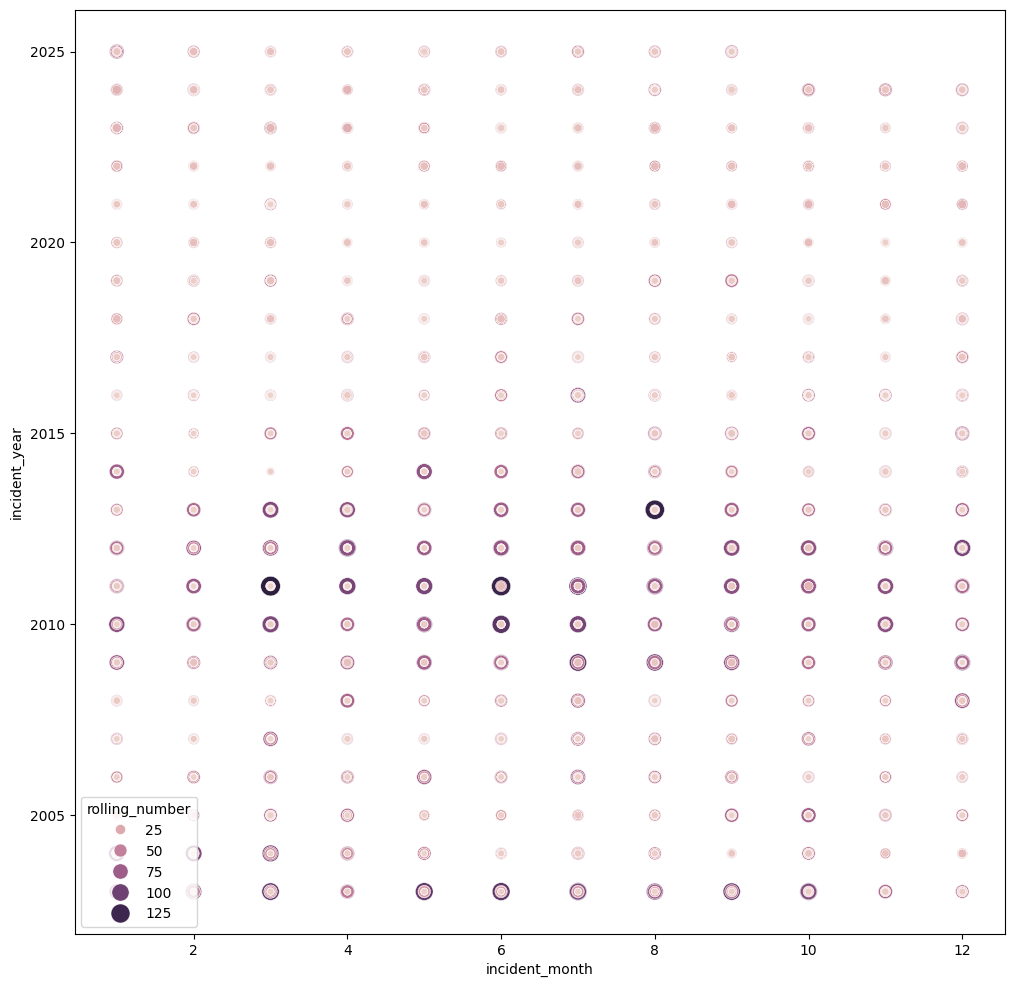

In [33]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=amount_table,x='incident_month',y='incident_year',hue='rolling_number',size='rolling_number',sizes=(20, 200))

In [24]:
amount_table.sort_values(by='incident_number' ,ascending=False)

,neighborhood_district,incident_year,incident_month,primary_situation,incident_number,date_key
27816,Tenderloin,2011,3,"711 - Municipal alarm system, Street Box False",134,2011-3
28019,Tenderloin,2013,8,"711 - Municipal alarm system, Street Box False",129,2013-8
27837,Tenderloin,2011,6,"711 - Municipal alarm system, Street Box False",128,2011-6
27753,Tenderloin,2010,6,"711 - Municipal alarm system, Street Box False",110,2010-6
16093,Mission,2011,7,"711 - Municipal alarm system, Street Box False",110,2011-7
...,...,...,...,...,...,...
5474,Castro/Upper Market,2018,11,"113 Cooking fire, confined to container",1,2018-11
5475,Castro/Upper Market,2018,11,"150 Outside rubbish fire, other",1,2018-11
5445,Castro/Upper Market,2018,8,"500 Service Call, other",1,2018-8
5449,Castro/Upper Market,2018,8,735 Alarm system sounded due to malfunction,1,2018-8


In [156]:
pre[pre['address']=='1 DUBOCE AV']['point'].iloc[0]

{'type': 'Point', 'coordinates': [-122.42008, 37.77003]}

In [160]:
by_year['address'].apply(lambda x:x.lower())

0                     1 duboce av
1                     1 duboce av
2                    1 duboce av.
3                    1 duboce av.
4                    1 duboce av.
                  ...            
1002      valencia st. / 17th st.
1003      valencia st. / 19th st.
1004      valencia st. / 24th st.
1005      valencia st. / 25th st.
1006    van ness av. / market st.
Name: address, Length: 1007, dtype: object

In [149]:
by_year.sort_values(by='incident_number')

,address,year,incident_number
995,Shotwell St. / 21st St.,2009,1
994,Potrero Av. / 23rd St.,2012,1
993,Potrero Av. / 21st St.,2009,1
992,Mission St. / South Van Ness Av.,2003,1
978,Market St. / Octavia St.,2004,1
...,...,...,...
282,16th St. / Mission St.,2012,65
786,26th St. / Mission St.,2006,66
204,15th St. / Mission St.,2012,70
662,24th St. / Folsom St.,2011,91
